# Weak Scaling

In [1]:
# libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import re
from unum import Unum
# data
from data.data import *
from data.cluster_data import *

# setup
sns.set_theme(style="whitegrid", palette="Set2", font_scale=0.85, rc={
    'xtick.bottom': True,
    'ytick.left': True,
})
# sns.set_theme(style="ticks", palette="Set2")
# Read the data
raw_data_o0_np4: pd.DataFrame = data.parse_data('../reports/base_np4.txt')
raw_data_o0_np16: pd.DataFrame = data.parse_data('../reports/base_np16.txt')
raw_data_o0_np64: pd.DataFrame = data.parse_data('../reports/base_np64.txt')
raw_data_o1_np4: pd.DataFrame = data.parse_data('../reports/opt_o1_np4.txt')
raw_data_o1_np16: pd.DataFrame = data.parse_data('../reports/opt_o1_np16.txt')
raw_data_o1_np64: pd.DataFrame = data.parse_data('../reports/opt_o1_np64.txt')
raw_data_o2_np4: pd.DataFrame = data.parse_data('../reports/opt_o2_np4.txt')
raw_data_o2_np16: pd.DataFrame = data.parse_data('../reports/opt_o2_np16.txt')
raw_data_o2_np64: pd.DataFrame = data.parse_data('../reports/opt_o2_np64.txt')
raw_data_o3_np4: pd.DataFrame = data.parse_data('../reports/opt_o3_np4.txt')
raw_data_o3_np16: pd.DataFrame = data.parse_data('../reports/opt_o3_np16.txt')
raw_data_o3_np64: pd.DataFrame = data.parse_data('../reports/opt_o3_np64.txt')
checkSymm = raw_data_o0_np4.loc[raw_data_o0_np4.name.isin(['matTranspose'])].copy()
checkSymm.name = 'matTransposeMPI'
checkSymm['np'] = '1'
checkSymm['bandwidth'] = checkSymm.apply(lambda row: data.effective_bandwidth((row.space * 4) ** 2, row['mean'], True), axis=1)

# matTranspose OMP

In [2]:
raw_data_o0: pd.DataFrame = data.parse_data('../reports_omp/base.txt')
raw_data_o1: pd.DataFrame = data.parse_data('../reports_omp/opt_o1.txt')
raw_data_o2: pd.DataFrame = data.parse_data('../reports_omp/opt_o2.txt')
raw_data_o3: pd.DataFrame = data.parse_data('../reports_omp/opt_o3.txt')
checkSymm = raw_data_o0.loc[raw_data_o0.name.isin(['matTranspose base'])].copy()
checkSymm.name = 'matTranspose base o0'

checkSymm_omp_o0 = raw_data_o0.loc[raw_data_o0.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()
checkSymm_omp_o1 = raw_data_o1.loc[raw_data_o1.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()
checkSymm_omp_o2 = raw_data_o2.loc[raw_data_o2.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()
checkSymm_omp_o3 = raw_data_o3.loc[raw_data_o3.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()

In [3]:
mean_base = checkSymm.loc[checkSymm.space == 8, 'mean'].iloc[0]
#mean_base = checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == 16, 'mean'].iloc[0]
space = [64, 128, 256]
checkSymm_speedup_omp_o0 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_omp_o0.loc[(checkSymm_omp_o0.space == space[0]) & (checkSymm_omp_o0.name == 'matTranspose omp 4'), 'mean'].iloc[0],
        checkSymm_omp_o0.loc[(checkSymm_omp_o0.space == space[1]) & (checkSymm_omp_o0.name == 'matTranspose omp 16'), 'mean'].iloc[0],
        checkSymm_omp_o0.loc[(checkSymm_omp_o0.space == space[2]) & (checkSymm_omp_o0.name == 'matTranspose omp 64'), 'mean'].iloc[0]
    ],
    'name': ["matTransposeOMP", "matTransposeOMP", "matTransposeOMP"]
})
checkSymm_speedup_omp_o0['name'] = checkSymm_speedup_omp_o0['name'].astype(str)
checkSymm_speedup_omp_o0['weak_scaling'] = checkSymm_speedup_omp_o0.apply(lambda row: mean_base / row['mean'], axis=1).copy()
#print(checkSymm_speedup_o0)

checkSymm_speedup_omp_o1 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_omp_o1.loc[(checkSymm_omp_o1.space == space[0]) & (checkSymm_omp_o1.name == 'matTranspose omp 4'), 'mean'].iloc[0],
        checkSymm_omp_o1.loc[(checkSymm_omp_o1.space == space[1]) & (checkSymm_omp_o1.name == 'matTranspose omp 16'), 'mean'].iloc[0],
        checkSymm_omp_o1.loc[(checkSymm_omp_o1.space == space[2]) & (checkSymm_omp_o1.name == 'matTranspose omp 64'), 'mean'].iloc[0]
    ],
    'name': ["matTransposeOMP", "matTransposeOMP", "matTransposeOMP"]
})
checkSymm_speedup_omp_o1['name'] = checkSymm_speedup_omp_o1['name'].astype(str)
checkSymm_speedup_omp_o1['weak_scaling'] = checkSymm_speedup_omp_o1.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_omp_o2 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_omp_o2.loc[(checkSymm_omp_o2.space == space[0]) & (checkSymm_omp_o2.name == 'matTranspose omp 4'), 'mean'].iloc[0],
        checkSymm_omp_o2.loc[(checkSymm_omp_o2.space == space[1]) & (checkSymm_omp_o2.name == 'matTranspose omp 16'), 'mean'].iloc[0],
        checkSymm_omp_o2.loc[(checkSymm_omp_o2.space == space[2]) & (checkSymm_omp_o2.name == 'matTranspose omp 64'), 'mean'].iloc[0]
    ],
    'name': ["matTransposeOMP", "matTransposeOMP", "matTransposeOMP"]
})
checkSymm_speedup_omp_o2['name'] = checkSymm_speedup_omp_o2['name'].astype(str)
checkSymm_speedup_omp_o2['weak_scaling'] = checkSymm_speedup_omp_o2.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_omp_o3 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_omp_o3.loc[(checkSymm_omp_o3.space == space[0]) & (checkSymm_omp_o3.name == 'matTranspose omp 4'), 'mean'].iloc[0],
        checkSymm_omp_o3.loc[(checkSymm_omp_o3.space == space[1]) & (checkSymm_omp_o3.name == 'matTranspose omp 16'), 'mean'].iloc[0],
        checkSymm_omp_o3.loc[(checkSymm_omp_o3.space == space[2]) & (checkSymm_omp_o3.name == 'matTranspose omp 64'), 'mean'].iloc[0]
    ],
    'name': ["matTransposeOMP", "matTransposeOMP", "matTransposeOMP"]
})
checkSymm_speedup_omp_o3['name'] = checkSymm_speedup_omp_o3['name'].astype(str)
checkSymm_speedup_omp_o3['weak_scaling'] = checkSymm_speedup_omp_o3.apply(lambda row: mean_base / row['mean'], axis=1).copy()

# matTranspose

In [4]:
checkSymm_base_o0_np4 = raw_data_o0_np4.loc[raw_data_o0_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o0_np16 = raw_data_o0_np16.loc[raw_data_o0_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o0_np64 = raw_data_o0_np64.loc[raw_data_o0_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o0_np4['np'] = '4'
checkSymm_base_o0_np16['np'] = '16'
checkSymm_base_o0_np64['np'] = '64'

checkSymm_base_o1_np4 = raw_data_o1_np4.loc[raw_data_o1_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o1_np16 = raw_data_o1_np16.loc[raw_data_o1_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o1_np64 = raw_data_o1_np64.loc[raw_data_o1_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o1_np4['np'] = '4'
checkSymm_base_o1_np16['np'] = '16'
checkSymm_base_o1_np64['np'] = '64'

checkSymm_base_o2_np4 = raw_data_o2_np4.loc[raw_data_o2_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o2_np16 = raw_data_o2_np16.loc[raw_data_o2_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o2_np64 = raw_data_o2_np64.loc[raw_data_o2_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o2_np4['np'] = '4'
checkSymm_base_o2_np16['np'] = '16'
checkSymm_base_o2_np64['np'] = '64'

checkSymm_base_o3_np4 = raw_data_o3_np4.loc[raw_data_o3_np4.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o3_np16 = raw_data_o3_np16.loc[raw_data_o3_np16.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o3_np64 = raw_data_o3_np64.loc[raw_data_o3_np64.name.isin(['matTransposeMPI'])].copy()
checkSymm_base_o3_np4['np'] = '4'
checkSymm_base_o3_np16['np'] = '16'
checkSymm_base_o3_np64['np'] = '64'

In [5]:
mean_base = checkSymm.loc[checkSymm.space == 8, 'mean'].iloc[0]
#mean_base = checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == 16, 'mean'].iloc[0]
space = [64, 128, 256]
checkSymm_speedup_o0 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o0_np16.loc[checkSymm_base_o0_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o0_np64.loc[checkSymm_base_o0_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPI", "matTransposeMPI", "matTransposeMPI"]
})
checkSymm_speedup_o0['name'] = checkSymm_speedup_o0['name'].astype(str)
checkSymm_speedup_o0['weak_scaling'] = checkSymm_speedup_o0.apply(lambda row: mean_base / row['mean'], axis=1).copy()
#print(checkSymm_speedup_o0)

checkSymm_speedup_o1 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o1_np4.loc[checkSymm_base_o1_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o1_np16.loc[checkSymm_base_o1_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o1_np64.loc[checkSymm_base_o1_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPI", "matTransposeMPI", "matTransposeMPI"]

})
checkSymm_speedup_o1['name'] = checkSymm_speedup_o1['name'].astype(str)
checkSymm_speedup_o1['weak_scaling'] = checkSymm_speedup_o1.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_o2 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o2_np4.loc[checkSymm_base_o2_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o2_np16.loc[checkSymm_base_o2_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o2_np64.loc[checkSymm_base_o2_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPI", "matTransposeMPI", "matTransposeMPI"]

})
checkSymm_speedup_o2['name'] = checkSymm_speedup_o2['name'].astype(str)
checkSymm_speedup_o2['weak_scaling'] = checkSymm_speedup_o2.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_o3 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_base_o3_np4.loc[checkSymm_base_o3_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_base_o3_np16.loc[checkSymm_base_o3_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_base_o3_np64.loc[checkSymm_base_o3_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPI", "matTransposeMPI", "matTransposeMPI"]

})
checkSymm_speedup_o3['name'] = checkSymm_speedup_o3['name'].astype(str)
checkSymm_speedup_o3['weak_scaling'] = checkSymm_speedup_o3.apply(lambda row: mean_base / row['mean'], axis=1).copy()

# matTransposeBlock

In [6]:
checkSymm_block_o0_np4 = raw_data_o0_np4.loc[raw_data_o0_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o0_np16= raw_data_o0_np16.loc[raw_data_o0_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o0_np64 = raw_data_o0_np64.loc[raw_data_o0_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o0_np4['np'] = '4'
checkSymm_block_o0_np16['np'] = '16'
checkSymm_block_o0_np64['np'] = '64'

checkSymm_block_o1_np4 = raw_data_o1_np4.loc[raw_data_o1_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o1_np16 = raw_data_o1_np16.loc[raw_data_o1_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o1_np64 = raw_data_o1_np64.loc[raw_data_o1_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o1_np4['np'] = '4'
checkSymm_block_o1_np16['np'] = '16'
checkSymm_block_o1_np64['np'] = '64'

checkSymm_block_o2_np4 = raw_data_o2_np4.loc[raw_data_o2_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o2_np16 = raw_data_o2_np16.loc[raw_data_o2_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o2_np64 = raw_data_o2_np64.loc[raw_data_o2_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o2_np4['np'] = '4'
checkSymm_block_o2_np16['np'] = '16'
checkSymm_block_o2_np64['np'] = '64'

checkSymm_block_o3_np4 = raw_data_o3_np4.loc[raw_data_o3_np4.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o3_np16 = raw_data_o3_np16.loc[raw_data_o3_np16.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o3_np64 = raw_data_o3_np64.loc[raw_data_o3_np64.name.isin(['matTransposeMPIBlock'])].copy()
checkSymm_block_o3_np4['np'] = '4'
checkSymm_block_o3_np16['np'] = '16'
checkSymm_block_o3_np64['np'] = '64'

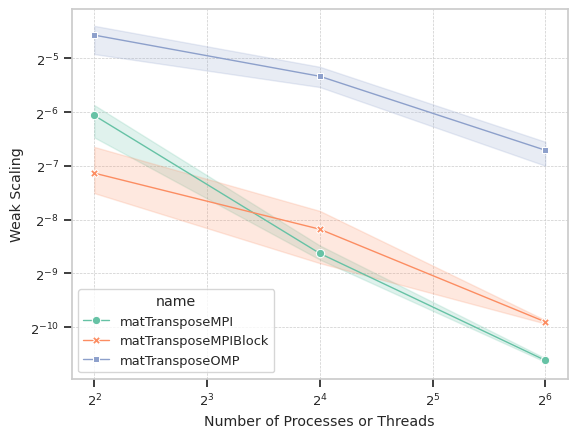

In [11]:
#mean_base = checkSymm_base_o0_np4.loc[checkSymm_base_o0_np4.space == 16, 'mean'].iloc[0]
space = [64, 128, 256]
checkSymm_speedup_block_o0 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_block_o0_np4.loc[checkSymm_block_o0_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_block_o0_np16.loc[checkSymm_block_o0_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_block_o0_np64.loc[checkSymm_block_o0_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPIBlock", "matTransposeMPIBlock", "matTransposeMPIBlock"]

})
checkSymm_speedup_block_o0['name'] = checkSymm_speedup_block_o0['name'].astype(str)
checkSymm_speedup_block_o0['weak_scaling'] = checkSymm_speedup_block_o0.apply(lambda row: mean_base / row['mean'], axis=1).copy()
#print(checkSymm_speedup_o0)

checkSymm_speedup_block_o1 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_block_o1_np4.loc[checkSymm_block_o1_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_block_o1_np16.loc[checkSymm_block_o1_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_block_o1_np64.loc[checkSymm_block_o1_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPIBlock", "matTransposeMPIBlock", "matTransposeMPIBlock"]
})
checkSymm_speedup_block_o1['name'] = checkSymm_speedup_block_o1['name'].astype(str)
checkSymm_speedup_block_o1['weak_scaling'] = checkSymm_speedup_block_o1.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_block_o2 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_block_o2_np4.loc[checkSymm_block_o2_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_block_o2_np16.loc[checkSymm_block_o2_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_block_o2_np64.loc[checkSymm_block_o2_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPIBlock", "matTransposeMPIBlock", "matTransposeMPIBlock"]

})
checkSymm_speedup_block_o2['name'] = checkSymm_speedup_block_o2['name'].astype(str)
checkSymm_speedup_block_o2['weak_scaling'] = checkSymm_speedup_block_o2.apply(lambda row: mean_base / row['mean'], axis=1).copy()

checkSymm_speedup_block_o3 = pd.DataFrame({
    'np': [4, 16, 64],
    'space': space,
    'mean': [
        checkSymm_block_o3_np4.loc[checkSymm_block_o3_np4.space == space[0], 'mean'].iloc[0],
        checkSymm_block_o3_np16.loc[checkSymm_block_o3_np16.space == space[1], 'mean'].iloc[0],
        checkSymm_block_o3_np64.loc[checkSymm_block_o3_np64.space == space[2], 'mean'].iloc[0]
    ],
    'name': ["matTransposeMPIBlock", "matTransposeMPIBlock", "matTransposeMPIBlock"]

})
checkSymm_speedup_block_o3['name'] = checkSymm_speedup_block_o3['name'].astype(str)
checkSymm_speedup_block_o3['weak_scaling'] = checkSymm_speedup_block_o3.apply(lambda row: mean_base / row['mean'], axis=1).copy()

lp = sns.lineplot(
    data=pd.concat([checkSymm_speedup_o0, checkSymm_speedup_o1, checkSymm_speedup_o2, checkSymm_speedup_o3, \
                   checkSymm_speedup_block_o0, checkSymm_speedup_block_o1, checkSymm_speedup_block_o2, checkSymm_speedup_block_o3, \
                   checkSymm_speedup_omp_o0, checkSymm_speedup_omp_o1, checkSymm_speedup_omp_o2, checkSymm_speedup_omp_o3]),

    x="np", y="weak_scaling", hue="name", style="name",
    markers=True, dashes=False,
    linewidth = 1
)
lp.set_xscale('log', base=2)
lp.set_yscale('log', base=2)
lp.set_xlabel('Number of Processes or Threads')
lp.set_ylabel('Weak Scaling')
lp.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.show()
fig = lp.get_figure()
fig.savefig("../images/matTransposeMPI_block_weak_scaling_final.svg", format='svg') 

---